In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
cwd = os.getcwd()

In [5]:
premier = pd.read_csv(cwd + '\\processed_data\Merged_Table_Week1.csv')

In [6]:
premier.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 199 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   aerials_lost                           float64
 1   aerials_won                            float64
 2   aerials_won_pct                        float64
 3   age                                    float64
 4   assisted_shots                         float64
 5   assists                                float64
 6   assists_per90                          float64
 7   avg_distance_def_actions_gk            float64
 8   ball_recoveries                        float64
 9   blocked_passes                         float64
 10  blocked_shots                          float64
 11  blocked_shots_saves                    float64
 12  blocks                                 float64
 13  cards_red                              float64
 14  cards_yellow                           float64
 15  cards

In [7]:
premier['main_foot'] = ['R' if (x['passes_left_foot']<x['passes_right_foot']) else 'L' for i,x in premier.iterrows()]

In [8]:
premier['main_foot'].value_counts()

R    149
L    139
Name: main_foot, dtype: int64

In [10]:
premier.set_index('player',inplace=True)

In [11]:
def plot_two_variables(x,y):
    fig, ax = plt.subplots(figsize=(20,8))
    ax=sns.regplot(x, y)
    xlabel = x.name.replace('_',' ').title()
    ylabel = y.name.replace('_',' ').title()
    plt.xlabel('{}'.format(xlabel))
    plt.ylabel('{}'.format(ylabel))
    plt.title('{} vs. {}'.format(xlabel,ylabel))


    for i, txt in enumerate(x.index):
        ax.annotate(txt, (x[i], y[i]))

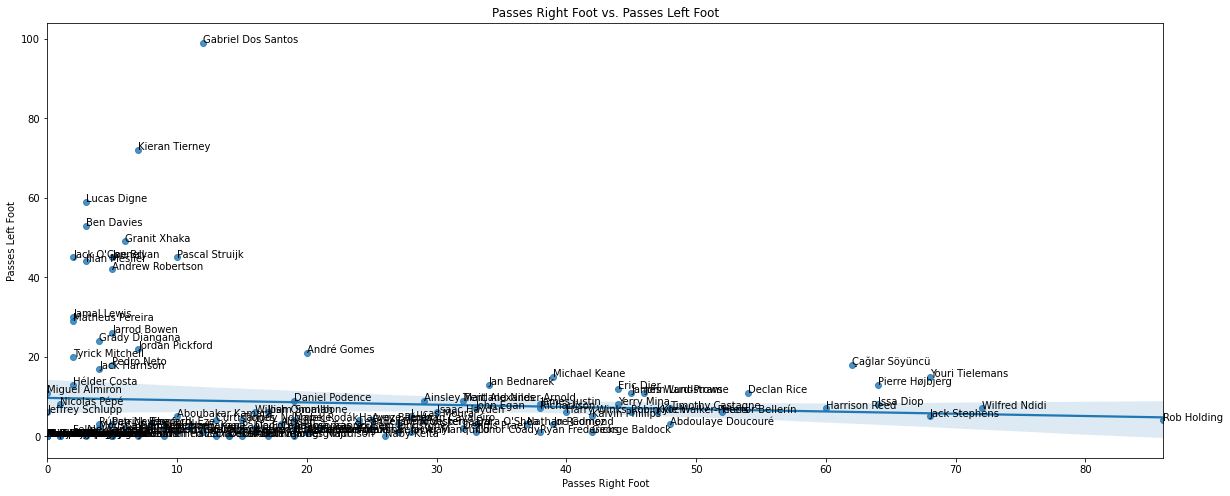

In [12]:
plot_two_variables(premier[premier['age']<28]['passes_right_foot'], premier[premier['age']<28]['passes_left_foot'])

## **Scout Players**

In [137]:
premier[premier.index.isin(['Declan Rice','Emi Buendía','Jonny Castro','Chris Basham','James McArthur','Abdoulaye Doucouré','Danny Ings','Neal Maupay','Dwight McNeil','Diego Rico'])][['pos1','team']]

,pos1,team
player,,
Diego Rico,DF,Bournemouth
Neal Maupay,FW,Brighton
Dwight McNeil,MF,Burnley
James McArthur,MF,Crystal Palace
Emi Buendía,FW,Norwich City
Chris Basham,DF,Sheffield Utd
Danny Ings,FW,Southampton
Abdoulaye Doucouré,MF,Watford
Declan Rice,MF,West Ham
